In [1]:
!nvidia-smi

Sun Jun 13 17:15:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
print(os.getcwd())

/content


In [4]:
import numpy as np
import seaborn as sns
import itertools

In [5]:
base_dir = '/content/drive/MyDrive/Dl projects/CNN basics/x-ray cnn model/xray_images'

train_dir = base_dir + '/training'
test_dir = base_dir + '/testing'
# val_dir = base_dir + '/validation'

classes = os.listdir(train_dir)

training_data = []
testing_data = []
# validation_data = []

train_total = 0
test_total = 0
# val_total = 0

for i in range(len(classes)):
    print('\nFor Class  = {}'.format(classes[i]))
    
    c1 = os.listdir(train_dir + '/' + classes[i])
    n1 = [classes[i]]
    n1 = n1 * len(c1)
    training_data.append(n1)
    train_total = train_total + len(c1)
    print('Number of training images = {}'.format(len(c1)))

    
    c2 = os.listdir(test_dir + '/' + classes[i])
    n2 = [classes[i]]
    n2 = n2 * len(c2)
    testing_data.append(n2)
    test_total = test_total + len(c2)
    print('Number of testing images = {}'.format(len(c2)))

#     c3 = os.listdir(val_dir + '/' + classes[i])
#     n3 = [classes[i]]
#     n3 = n3 * len(c3)
#     validation_data.append(n3)
#     print('Number of validation images = {}'.format(len(c3))

    print('******************************************************************************************')
    
training_data = list(itertools.chain(*training_data))
training_data = np.array(training_data)
print('\nTotal training images = ',train_total)

testing_data = list(itertools.chain(*testing_data))
testing_data = np.array(testing_data).ravel()
print('Total testing images = ',test_total)

# validation_data = list(itertools.chain(*validation_data))
# validation_data = np.array(validation_data).ravel()
# print('Total validation images = ',val_total)


For Class  = NORMAL
Number of training images = 1073
Number of testing images = 268
******************************************************************************************

For Class  = PNEUMONIA
Number of training images = 3100
Number of testing images = 775
******************************************************************************************

Total training images =  4173
Total testing images =  1043


In [6]:
unique_classes = np.unique(np.array(training_data))

from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight = 'balanced',classes = np.unique(np.array(training_data)) ,y = training_data)

class_weights = dict.fromkeys(np.unique(np.array(training_data)))
for i in range(len(unique_classes )):
  class_weights[unique_classes[i]] = weights[i]
class_weights

{'NORMAL': 1.9445479962721341, 'PNEUMONIA': 0.6730645161290323}

Distribution of training data


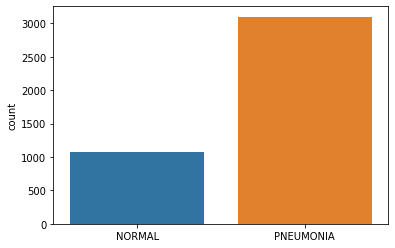



Distribution of testing data


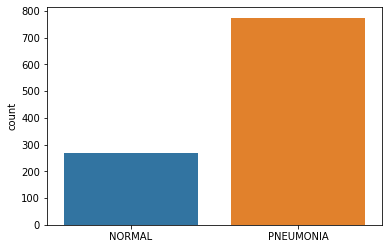

In [7]:
import matplotlib.pyplot as plt

print('Distribution of training data')
sns.countplot(x = training_data)
plt.show()

print('\n\nDistribution of testing data')
sns.countplot(x = testing_data)
plt.show()

# print('\n\nDistribution of validation data')
# sns.countplot(x = validation_data)
# plt.show()

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [9]:
n_images = 5

d = dict.fromkeys(classes, None)
for i in range(len(classes)):
    path = train_dir + '/' + classes[i]
    l = os.listdir(path)
    c = np.random.choice(l, n_images, replace=False).tolist()
    for j in range(len(c)):
        c[j] = path + '/' + c[j]
    d[classes[i]] = c


Sample images of class :  NORMAL


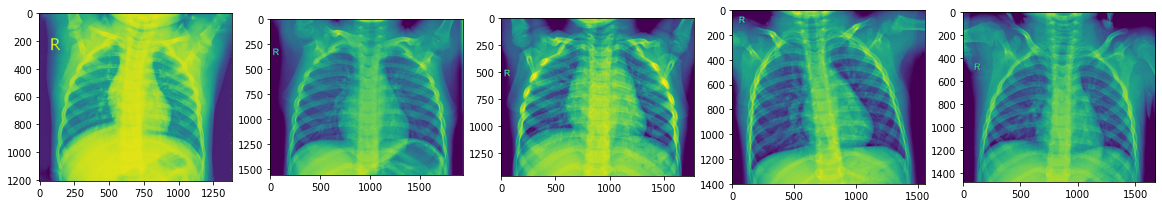


Sample images of class :  PNEUMONIA


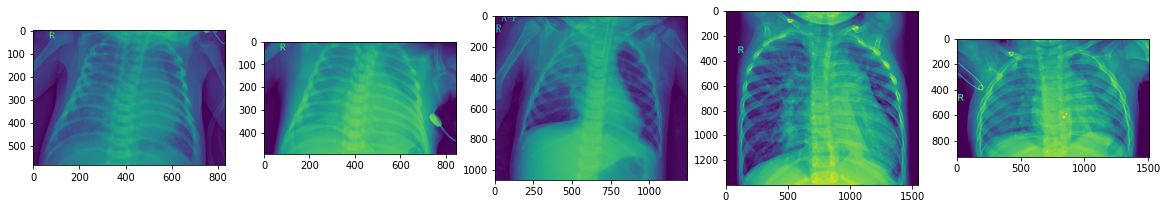

In [10]:
for i in range(len(classes)):
    print('\nSample images of class : ',classes[i])
    images = d[classes[i]]
    plt.figure(figsize=(20,5))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)
    plt.show()

In [11]:
import time
import tensorflow as tf
print(tf.__version__)

2.5.0


In [12]:
i = tf.keras.layers.Input(shape = (150, 150, 1))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_1') (i)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_1') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_1') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_1') (x)


x = tf.keras.layers.Conv2D(32, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_2') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_2') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_2') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_2') (x)


x = tf.keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_3') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_3') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_3') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_3') (x)


x = tf.keras.layers.Conv2D(128, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_4') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_4') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_4') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_4') (x)


# x = tf.keras.layers.GlobalMaxPooling2D(name='G_maxpool2d') (x)
x = tf.keras.layers.Flatten(name='flatten') (x)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='dense_1') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_1') (x)

x = tf.keras.layers.Dense(256, activation=tf.nn.relu, name='dense_2') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_2') (x)

# x = tf.keras.layers.Dense(5, activation = tf.nn.softmax, name='output_layer') (x)
x = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, name='output_layer') (x)



In [13]:
model = tf.keras.models.Model(inputs = i, outputs = x)

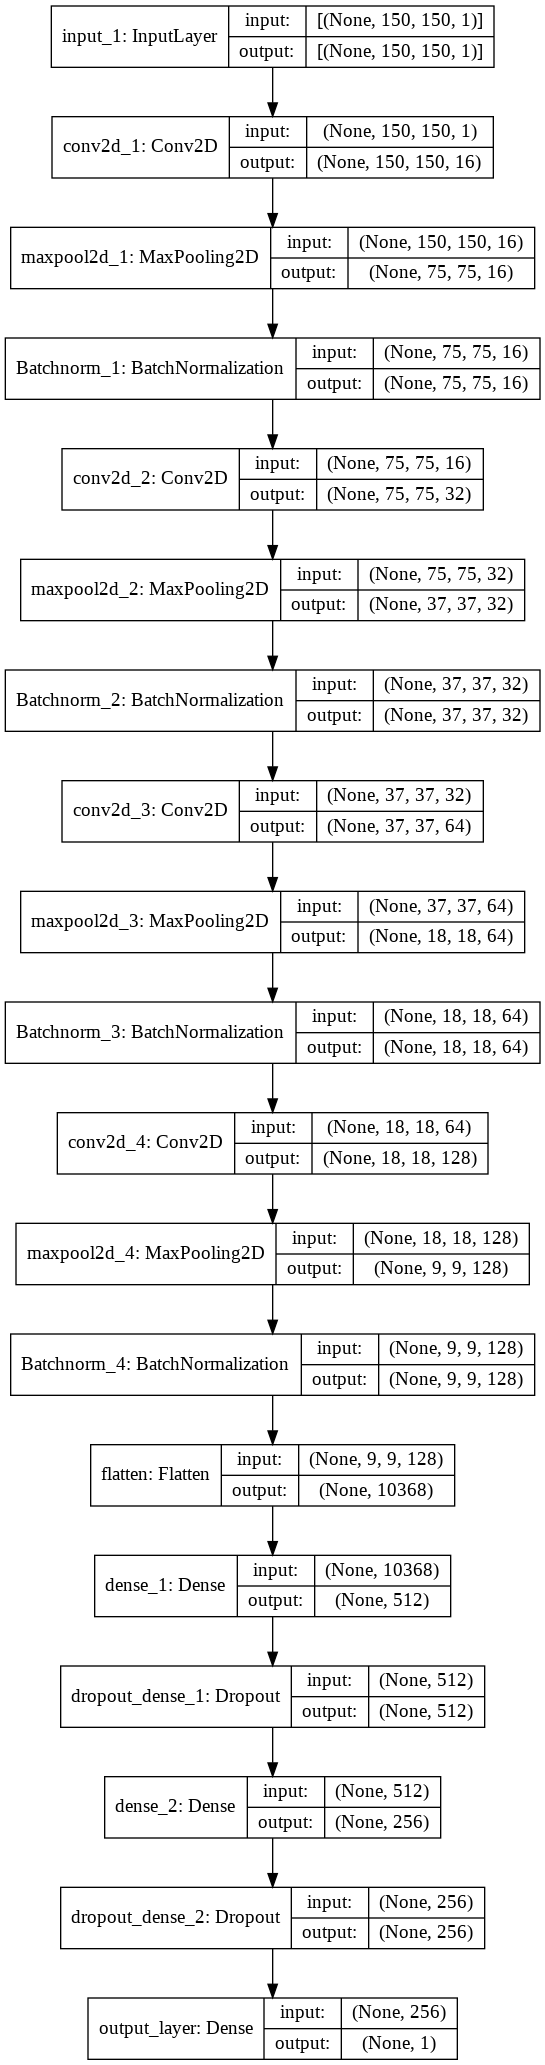

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      160       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 75, 75, 16)        0         
_________________________________________________________________
Batchnorm_1 (BatchNormalizat (None, 75, 75, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
maxpool2d_2 (MaxPooling2D)   (None, 37, 37, 32)        0         
_________________________________________________________________
Batchnorm_2 (BatchNormalizat (None, 37, 37, 32)        128   

In [16]:
# from sklearn.metrics import confusion_matrix
# import numpy as np

# def balanced_accuracy(y_true, y_pred):
#   y_true = y_true.numpy()
#   y_pred = y_pred.numpy()
#   y_true = np.argmax(y_true,axis=-1)
#   y_pred = np.argmax(y_pred,axis=-1)

#   y_true = y_true.ravel()
#   y_pred = y_pred.ravel()
#   num_classes = len(np.unique(y_true))

#   cm = confusion_matrix(y_true, y_pred).T
#   balanced_accuracy = 0
#   for i in range(num_classes):
#     num = cm[i,i]
#     den = np.sum(cm[:,i])
#     if num == 0 :
#       acc = 0
#     else:
#       acc = num / den
#     balanced_accuracy += acc

#   return (balanced_accuracy / num_classes)

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

def binary_balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()

  y_true = y_true.ravel()
  y_pred = np.round(y_pred.ravel())
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.binary_crossentropy , #tf.keras.losses.categorical_crossentropy
              metrics = binary_balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.BinaryAccuracy()

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255 )
test_datagen  = ImageDataGenerator( rescale = 1.0/255 )

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
# train_datagen = ImageDataGenerator( rescale = 1.0/255.0, rotation_range = 40, 
#                                    width_shift_range=0.2, height_shift_range=0.2, 
#                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, 
#                                    vertical_flip=True, fill_mode="nearest")

# test_datagen  = ImageDataGenerator( rescale = 1.0/255.0)


In [20]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=32,
        class_mode='binary', #'categorical'
        shuffle = True ,
        color_mode="grayscale" ) #'rgb'

y_train = train_generator.classes

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', #'categorical'
        shuffle = True ,
        color_mode="grayscale" ) #'rgb'

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [21]:
label_map = (train_generator.class_indices)
label_map

{'NORMAL': 0, 'PNEUMONIA': 1}

In [22]:
weights = {}
labels = list(label_map.keys())
for i in range(len(labels)):
  weights[i] = class_weights[labels[i]]
del class_weights

label_dict = dict([(value, key) for key, value in label_map.items()])
print(label_dict)
print(weights)

{0: 'NORMAL', 1: 'PNEUMONIA'}
{0: 1.9445479962721341, 1: 0.6730645161290323}


In [23]:
batch_size = 32
steps_per_epoch = train_total // batch_size
validation_batch_size = 32
validation_steps = test_total // validation_batch_size

In [24]:
print(steps_per_epoch)
print(validation_steps)

130
32


In [25]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_balanced_accuracy', min_delta=0, patience=3,
    mode='max', baseline=None, restore_best_weights=True
)

In [26]:
print('Results for CNN Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = weights,
                   callbacks=[callback],
                   epochs = 5)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)


Results for CNN Classifier:-

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/5
130/130 [==============================] - 56s 397ms/step - loss: 0.6896 - binary_balanced_accuracy: 0.9070 - val_loss: 3.9681 - val_binary_balanced_accuracy: 0.5000
Epoch 2/5
130/130 [==============================] - 52s 399ms/step - loss: 0.6384 - binary_balanced_accuracy: 0.9409 - val_loss: 3.9830 - val_binary_balanced_accuracy: 0.5000
Epoch 3/5
130/130 [==============================] - 52s 398ms/step - loss: 0.4535 - binary_balanced_accuracy: 0.9562 - val_loss: 3.9428 - val_binary_balanced_accuracy: 0.5000
Epoch 4/5
130/130 [==============================] - 52s 397ms/step - loss: 0.4720 - binary_balanced_accuracy: 0.9553 - val_loss: 1.4572 - val_binary_balanced_accuracy: 0.7526
Epoch 5/5
130/130 [==============================] - 52s 397ms/step - loss: 0.5140 - binary_balanced_accuracy: 0.9553 - val_loss

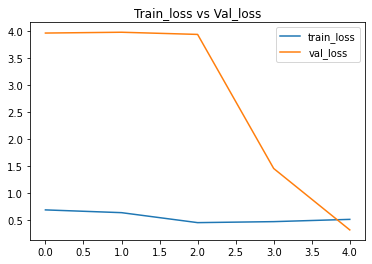

In [27]:
plt.plot(result.history['loss'] , label = 'train_loss')
plt.plot(result.history['val_loss'] , label = 'val_loss')
plt.title('Train_loss vs Val_loss')
plt.legend()
plt.show()

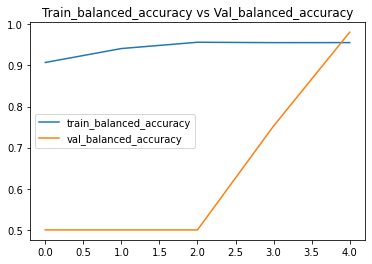

In [28]:
plt.plot(result.history['binary_balanced_accuracy'] , label = 'train_balanced_accuracy')
plt.plot(result.history['val_binary_balanced_accuracy'] , label = 'val_balanced_accuracy')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.legend()
plt.show()

In [29]:
train_datagen = ImageDataGenerator( rescale = 1.0/255 )

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=32,
        class_mode='binary', #'categorical'
        shuffle = False ,
        color_mode='grayscale' ) #'rgb'

batch_size = 32
y_train = train_generator.classes

Found 4173 images belonging to 2 classes.


In [30]:
test_datagen  = ImageDataGenerator( rescale = 1.0/255.0)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary', #'categorical'
        shuffle = False ,
        color_mode='grayscale' ) #'rgb'
 
test_batch_size = 32
y_test = test_generator.classes

Found 1043 images belonging to 2 classes.


In [31]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.round(y_pred1.ravel())
print('\nTotal time(sec) = ',(time.time() - start_time))


Total time(sec) =  37.32701516151428


In [32]:
!pip install scikit-plot

Prediction time(sec) =  9.880700588226318
33/33 [==============================] - 10s 291ms/step - loss: 0.3127 - binary_balanced_accuracy: 0.6640


Training score =  0.973583260680035
Tesing score =  0.980784785748676


No of missclassified for class NORMAL (test data) = 2 
No of missclassified for class PNEUMONIA (test data) = 24 
Total no of missclassified points(test data) =  26
Total % of missclassified points(test data) =  0.024928092042186004


Training log_loss =  0.32650625705718994
Tesing log_loss =  0.312666118144989


{'NORMAL': 0, 'PNEUMONIA': 1}


Confusion matrix:


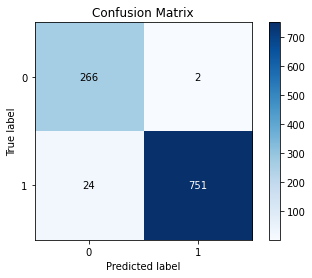



Classification report:-

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       268
           1       1.00      0.97      0.98       775

    accuracy                           0.98      1043
   macro avg       0.96      0.98      0.97      1043
weighted avg       0.98      0.98      0.98      1043

**************************************************************************


In [33]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score
 
start_time = time.time()
y_pred = model.predict(test_generator,batch_size = test_batch_size)
y_pred = np.round(y_pred.ravel())
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)
loss1_model = model.evaluate(train_generator,batch_size = batch_size)[0]
loss2_model = model.evaluate(test_generator,batch_size = test_batch_size)[0]

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

for i in range(len(classes)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_model)
print('Tesing log_loss = ',loss2_model)

print('\n')
print((test_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

CNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),loss1_model,loss2_model,model_time,model_time2]

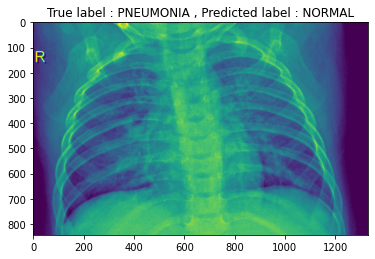

In [34]:
files = []
for filepath in test_generator.filepaths:
  files.append(filepath)

missclassified_idx = np.where(y_test != y_pred)[0] #((y_test == 3) & (y_pred == 1))[0]
i = np.random.choice(missclassified_idx)
img = mpimg.imread(files[i])
plt.imshow(img)
plt.title('True label : {} , Predicted label : {}'.format(labels[int(y_test[i])], labels[int(y_pred[i])]))
plt.show()

In [35]:
save_path = '/content/drive/MyDrive/Dl projects/CNN basics/x-ray cnn model'
model_name = 'xray_model'
model_path = save_path + '/' + model_name
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/CNN basics/x-ray cnn model/xray_model/assets


In [36]:
os.chdir(save_path)
print(os.getcwd())

import joblib
joblib.dump(label_dict , 'labels.joblib')

/content/drive/MyDrive/Dl projects/CNN basics/x-ray cnn model


['labels.joblib']